## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [3]:
pip install torch


   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/198.6 MB 1.1 MB/s eta 0:03:03
   ---------------------------------------- 0.3/198.6 MB 2.6 MB/s eta 0:01:16
   ---------------------------------------- 0.7/198.6 MB 4.6 MB/s eta 0:00:43
   ---------------------------------------- 1.2/198.6 MB 6.5 MB/s eta 0:00:31
   ---------------------------------------- 1.8/198.6 MB 7.6 MB/s eta 0:00:26
   ---------------------------------------- 2.3/198.6 MB 8.3 MB/s eta 0:00:24
    --------------------------------------- 2.9/198.6 MB 8.8 MB/s eta 0:00:23
    --------------------------------------- 3.5/198.6 MB 9.2 MB/s eta 0:00:22
    --------------------------------------- 4.0/198.6 MB 9.4 MB/s eta 0:00:21
    --------------------------------------- 4.6/198.6 MB 9.7 MB/s eta 0:00:21
   - -------------------------------------- 5.1/198.6 MB 9.9 MB/s eta 0:00:20
   - -------------------------------------- 5.7/198.6 MB 10.1 MB/s eta

In [12]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [6]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [7]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [8]:
y.backward()

In [9]:
x.grad

tensor([6.])

In [11]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [3]:
import torch

# creating a tensor with random 2 points
x = torch.tensor([1., 0.5], requires_grad=True)

def sigmoid(x):
    return (1/ (1 - torch.exp(-x)))

y = sigmoid(x)
y.backward(torch.tensor([1.0, 1.0]))
gradients_torch = x.grad

gradients_explicit = sigmoid(x) * (1 - sigmoid(x))

(gradients_torch, gradients_explicit)

(tensor([-0.9207, -3.9177]),
 tensor([-0.9207, -3.9177], grad_fn=<MulBackward0>))

Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [6]:
import torch

# creating a tensor with random 2 points
x = torch.tensor([1., 0.5], requires_grad=True)

def function(x):
    return x

y = function(x)
y.backward(torch.tensor([1., 1.]))
gradient_torch = x.grad

gradient_explicit = torch.tensor([1., 1.])

print(gradient_torch, gradient_explicit)

tensor([1., 1.]) tensor([1., 1.])


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [8]:
x_relu = torch.tensor([1.0, -1.0], requires_grad=True)

def relu(x):
    return torch.max(torch.tensor(0.0), x)

y_relu = relu(x_relu)
y_relu.backward(torch.tensor([1.0, 1.0]))
gradients_relu_pytorch = x_relu.grad

gradients_relu_explicit = torch.tensor([1.0 if x > 0 else 0.0 for x in x_relu])

print(gradients_relu_pytorch, gradients_relu_explicit)


tensor([1., 0.]) tensor([1., 0.])


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

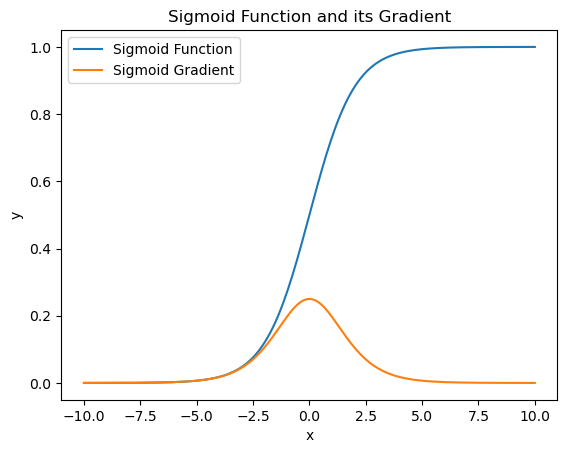

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sigmoid_and_gradient():
    # Generate a range of values from -10 to 10
    x_values = np.linspace(-10, 10, 200)
    # Calculate the sigmoid values
    sigmoid_values = 1 / (1 + np.exp(-x_values))
    # Calculate the gradient of the sigmoid
    gradient_values = sigmoid_values * (1 - sigmoid_values)

    # Plot the sigmoid function
    plt.plot(x_values, sigmoid_values, label='Sigmoid Function')

    # Plot the gradient of the sigmoid function
    plt.plot(x_values, gradient_values, label='Sigmoid Gradient')

    plt.title('Sigmoid Function and its Gradient')
    plt.xlabel('x')
    plt.ylabel('y')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot the sigmoid and its gradient
plot_sigmoid_and_gradient()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

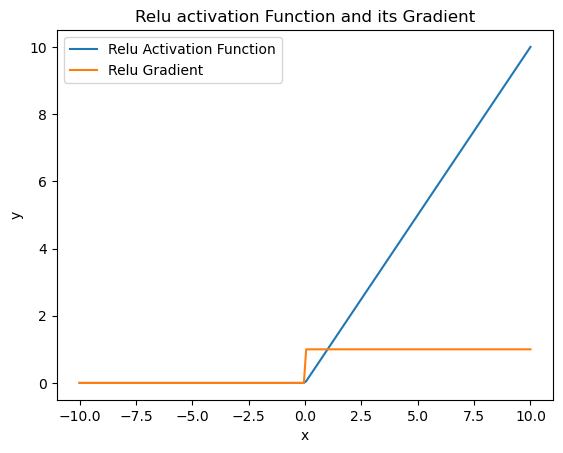

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_relu_and_activation():
    # Generate a range of values from -10 to 10
    x_values = np.linspace(-10, 10, 200)
    # Calculate the sigmoid values
    relu_values = np.maximum(0, x_values)
    # Calculate the gradient of the sigmoid
    gradient_values = np.where(x_values > 0, 1, 0)

    # Plot the sigmoid function
    plt.plot(x_values, relu_values, label='Relu Activation Function')

    # Plot the gradient of the sigmoid function
    plt.plot(x_values, gradient_values, label='Relu Gradient')

    plt.title('Relu activation Function and its Gradient')
    plt.xlabel('x')
    plt.ylabel('y')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot the sigmoid and its gradient
plot_relu_and_activation()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

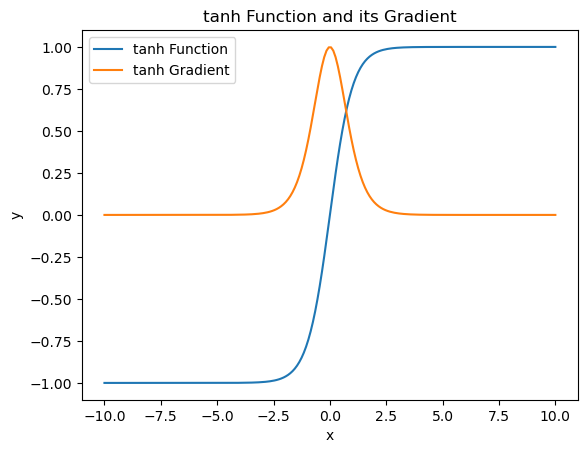

In [16]:
def plot_tanh_and_gradient():
    # Generate a range of values from -10 to 10
    x_values = np.linspace(-10, 10, 200)
    
    # Calculate the tanh values
    tanh_values = np.tanh(x_values)
    # Calculate the gradient of the tanh
    gradient_values = 1 - tanh_values**2

    # Plot the tanh function
    plt.plot(x_values, tanh_values, label='tanh Function')

    # Plot the gradient of the tanh function
    plt.plot(x_values, gradient_values, label='tanh Gradient')

    # Adding title and labels
    plt.title('tanh Function and its Gradient')
    plt.xlabel('x')
    plt.ylabel('y')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot the tanh and its gradient
plot_tanh_and_gradient()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

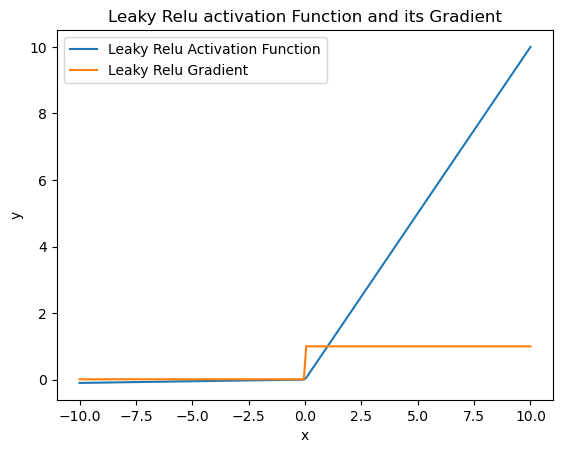

In [22]:
def plot_leaky_relu_and_activation(alpha=0.01):
    # Generate a range of values from -10 to 10
    x_values = np.linspace(-10, 10, 200)
    
    # Calculate the sigmoid values
    relu_values = np.maximum(alpha * x_values, x_values)
    # Calculate the gradient of the sigmoid
    gradient_values = np.where(x_values > 0, 1, alpha)

    # Plot the sigmoid function
    plt.plot(x_values, relu_values, label='Leaky Relu Activation Function')

    # Plot the gradient of the sigmoid function
    plt.plot(x_values, gradient_values, label='Leaky Relu Gradient')

    plt.title('Leaky Relu activation Function and its Gradient')
    plt.xlabel('x')
    plt.ylabel('y')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the function to plot the sigmoid and its gradient
plot_leaky_relu_and_activation()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [23]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [24]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.5153], grad_fn=<SigmoidBackward0>)


In [25]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2894
Epoch [200/1000], Loss: 0.2597
Epoch [300/1000], Loss: 0.2506
Epoch [400/1000], Loss: 0.2463
Epoch [500/1000], Loss: 0.2440
Epoch [600/1000], Loss: 0.2425
Epoch [700/1000], Loss: 0.2416
Epoch [800/1000], Loss: 0.2410
Epoch [900/1000], Loss: 0.2406
Epoch [1000/1000], Loss: 0.2403


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [39]:
import torch.optim as optim

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(2, 1) # Define a single linear layer with 2 input features and 1 output feature
    
    def forward(self, x):
        # The forward pass outputs the logit (before the sigmoid activation function)
        return self.linear(x)

# Create the dataset for the logical OR function
# Inputs and corresponding outputs for OR
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Step 2: Define a binary cross-entropy loss function
criterion = nn.BCEWithLogitsLoss()

# Step 3: Define a stochastic gradient descent optimizer
perceptron = Perceptron()
optimizer = optim.SGD(perceptron.parameters(), lr=0.3)

# training the model
for epoch in range(100):
    optimizer.zero_grad()   # Clear the gradients
    outputs = perceptron(inputs)  # Get the model predictions
    loss = criterion(outputs, targets)  # Compute the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    
    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/100, Loss: {loss.item()}')

# Step 5: Evaluate the trained model and compute the accuracy
with torch.no_grad():  # No need to track gradients for evaluation
    predictions = perceptron(inputs)
    predicted_classes = (predictions >= 0.0).float()  # Apply threshold at 0
    accuracy = (predicted_classes == targets).float().mean()
    print(f'Accuracy: {accuracy.item()}')

Epoch 10/100, Loss: 0.42662060260772705
Epoch 20/100, Loss: 0.37097835540771484
Epoch 30/100, Loss: 0.3376239538192749
Epoch 40/100, Loss: 0.3113478124141693
Epoch 50/100, Loss: 0.2889869809150696
Epoch 60/100, Loss: 0.2694770395755768
Epoch 70/100, Loss: 0.25226476788520813
Epoch 80/100, Loss: 0.23697082698345184
Epoch 90/100, Loss: 0.22330209612846375
Epoch 100/100, Loss: 0.2110217660665512
Accuracy: 1.0
